In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_op
# from WindPy import *
from functools import reduce
import datetime
import os

In [79]:
name=os.listdir()

In [81]:
results=[item for item in name if item.split('.')[-1]=='csv']

In [86]:
frame=[]
for item in results:
    data=pd.read_csv(item)
    data.drop_duplicates(inplace=True)
    data.sort_values(by='utility',ascending=False)
    data=data.iloc[:10000,-4:]
    frame.append(data)

In [97]:
tmp=pd.concat(frame,axis=0)
tmp=tmp.round(2)
tmp.drop_duplicates(inplace=True)
tmp['group']=pd.qcut(tmp.utility,20,labels=[i for i in range(20)])

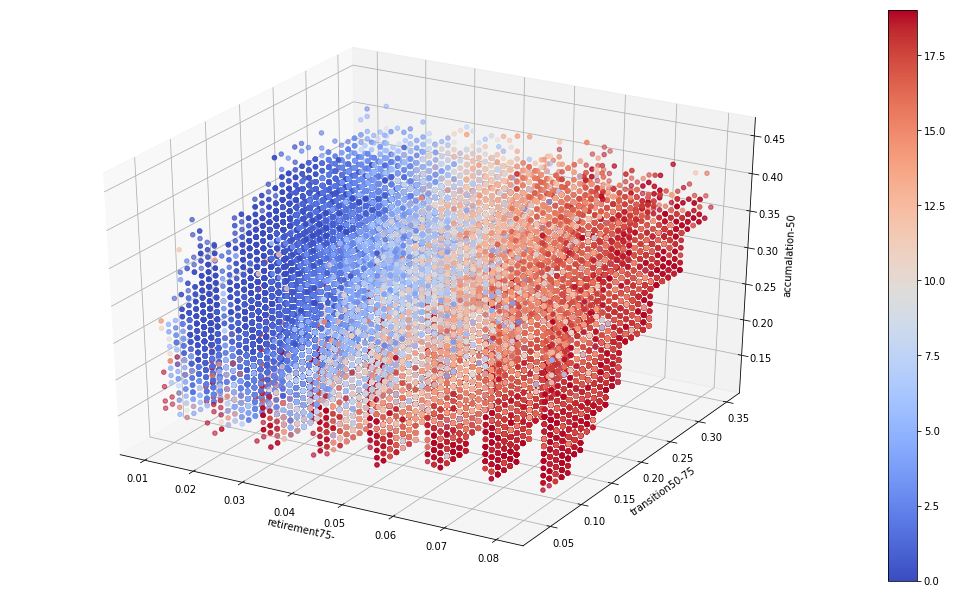

In [100]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
surf=ax.scatter(tmp.std3, tmp.std2,tmp.std1 , c=tmp.group, cmap=cm.coolwarm)
ax.set_xlabel('retirement75-')
ax.set_ylabel('transition50-75')
ax.set_zlabel('accumalation-50')
plt.colorbar(surf)
plt.savefig('result.png')
plt.show()